# Import libraries #

In [1]:
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from keras.models import load_model
import random

# Configure TensorFlow to use a GPU and manage its memory usage #

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Data preprocess #

In [3]:
classes = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z']
path_cr=[]
lb = LabelBinarizer()
one_hot_labels = lb.fit_transform(classes)
image=[]
label=[]
image_size=(28,28)

In [4]:
for i, cls in enumerate(classes):
    image_files = glob.glob(f'./CNN letter Dataset/{cls}/*.jpg')
    for image_file in image_files:
        img = cv2.imread(image_file)
        img = cv2.resize(img,image_size)
        label.append(one_hot_labels[i])
        image.append(img)

In [5]:
X= np.array(image)
Y= np.array(label)
X=X/255

# Split the data #

In [6]:
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Build, summarize, and compile deep learning models using TensorFlow's Keras API #

In [7]:
num_classes = len(classes)
cnn_cr= Sequential()
cnn_cr.add(Input(shape=(28,28,3)))
cnn_cr.add(Conv2D(32, kernel_size=(3, 3), activation='relu',strides = 1 , padding = 'same'))
cnn_cr.add(MaxPooling2D(pool_size=(2, 2),strides = 2 , padding = 'same'))
cnn_cr.add(Conv2D(64, kernel_size=(3, 3), activation='relu',strides = 1 , padding = 'same'))
cnn_cr.add(MaxPooling2D(pool_size=(2, 2),strides = 2 , padding = 'same'))
cnn_cr.add(BatchNormalization())
cnn_cr.add(Dropout(0.2))
cnn_cr.add(Flatten())
cnn_cr.add(Dense(256, activation='relu'))
cnn_cr.add(Dense(num_classes, activation='softmax'))
cnn_cr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_cr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 64)         256       
 ormalization)                                                   
                                                        

# Train and save the model #

In [8]:
with tf.device('/GPU:0'):
    hist_cnn = cnn_cr.fit(X_train, y_train, batch_size=50, epochs=20, verbose=1, validation_data=(X_val,y_val), callbacks=None)
    
cnn_cr.save('model/my_model_cr.h5', overwrite=True) 

Epoch 1/20
512/512 [==============================] - 24s 13ms/step - loss: 0.2407 - accuracy: 0.9327 - val_loss: 0.0471 - val_accuracy: 0.9928
Epoch 2/20
512/512 [==============================] - 6s 11ms/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.0719 - val_accuracy: 0.9811
Epoch 3/20
512/512 [==============================] - 5s 10ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0342 - val_accuracy: 0.9876
Epoch 4/20
512/512 [==============================] - 6s 11ms/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.0289 - val_accuracy: 0.9944
Epoch 5/20
512/512 [==============================] - 6s 11ms/step - loss: 0.0191 - accuracy: 0.9948 - val_loss: 0.1619 - val_accuracy: 0.9596
Epoch 6/20
512/512 [==============================] - 5s 10ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.0526 - val_accuracy: 0.9894
Epoch 7/20
512/512 [==============================] - 6s 11ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0212 - val_accuracy: 0.993

# Plot the training and validation accuracy of the model #

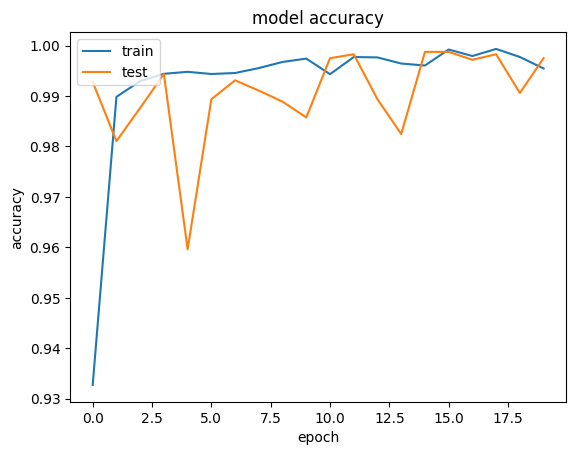

In [9]:
plt.plot(hist_cnn.history['accuracy'])
plt.plot(hist_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model = load_model('model/my_model_cr.h5')

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

111/111 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 0.9992

Test accuracy: 0.9991549253463745

Test loss: 0.004280551802366972


3550 2882


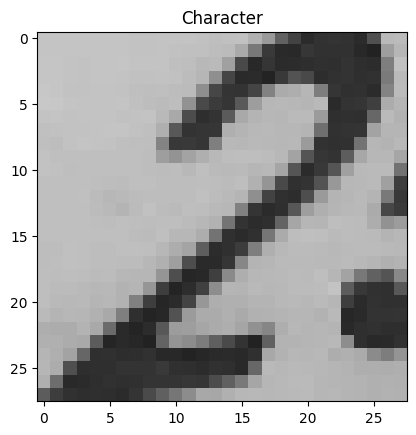

1/1 [==============================] - 0s 34ms/step
[2]
2


In [31]:
ran_num = random.randint(0,len(X_test))
print(len(X_test), ran_num)
plt.figure()
plt.imshow(X_test[ran_num])
plt.title('Character')
plt.show()
y = model.predict(X_test[ran_num:ran_num+1])
y_one_hot = np.argmax(y, axis=-1)  # 使用 -1 作為 axis 參數
print(y_one_hot)
print(classes[y_one_hot[0]])